# 1.Project Setup # Objective: Predict future Bitcoin prices using historical data and machine learning models

# 2. Data Collection

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("coinmarketcap_06122017.csv")
df.head()
print(df.info())
#df = pd.read_csv("D:\\csss\\coinmarketcap_06122017.csv")  # Make sure you're reading a CSV or creating a DataFrame

# Display basic statistics for numerical columns
print("\nStatistical Summary:")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326 entries, 0 to 1325
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1326 non-null   int64  
 1   24h_volume_usd      1270 non-null   float64
 2   available_supply    1031 non-null   float64
 3   id                  1326 non-null   object 
 4   last_updated        1326 non-null   int64  
 5   market_cap_usd      1031 non-null   float64
 6   max_supply          215 non-null    float64
 7   name                1326 non-null   object 
 8   percent_change_1h   1273 non-null   float64
 9   percent_change_24h  1270 non-null   float64
 10  percent_change_7d   1283 non-null   float64
 11  price_btc           1326 non-null   float64
 12  price_usd           1326 non-null   float64
 13  rank                1326 non-null   int64  
 14  symbol              1326 non-null   object 
 15  total_supply        1211 non-null   float64
dtypes: flo

In [2]:
print("sum of null",df.isna().sum())

sum of null Unnamed: 0               0
24h_volume_usd          56
available_supply       295
id                       0
last_updated             0
market_cap_usd         295
max_supply            1111
name                     0
percent_change_1h       53
percent_change_24h      56
percent_change_7d       43
price_btc                0
price_usd                0
rank                     0
symbol                   0
total_supply           115
dtype: int64


#  Remove the attributes with missing values

# .3 Data Preprocessing

In [3]:
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_csv("coinmarketcap_06122017.csv")

# Show the number of null values in each column before filling
print("Sum of null values before filling:\n", df.isna().sum())

# Replace missing values in 'max_supply' with the mean
print("Replacing missing values with mean in 'max_supply'")
print("Before Replacing max_supply:\n", df['max_supply'].head(7))
mean_value = df['max_supply'].mean()
print("\nMean of 'max_supply' column:", mean_value)
df['max_supply'] = df['max_supply'].fillna(mean_value)
print("\nAfter Replacing with Mean:\n", df['max_supply'].head(7))

# Replace missing values in 'available_supply' with the median
print("\nReplacing missing values with median in 'available_supply'")
print("Before Replacing available_supply:\n", df['available_supply'].head(7))
median_value = df['available_supply'].median()
print("\nMedian of 'available_supply' column:", median_value)
df['available_supply'] = df['available_supply'].fillna(median_value)
print("\nAfter Replacing with Median:\n", df['available_supply'].head(7))

# Replace missing values in 'market_cap_usd' with the mode
print("\nReplacing missing values with mode in 'market_cap_usd'")
print("Before Replacing market_cap_usd:\n", df['market_cap_usd'].head(7))
mode_value = df['market_cap_usd'].mode()[0]
print("\nMode of 'market_cap_usd' column:", mode_value)
df['market_cap_usd'] = df['market_cap_usd'].fillna(mode_value)
print("\nAfter Replacing with Mode:\n", df['market_cap_usd'].head(7))

# Replace missing values in 'total_supply' with the mode
print("\nReplacing missing values with mode in 'total_supply'")
print("Before Replacing total_supply:\n", df['total_supply'].head(7))
mode_value_total_supply = df['total_supply'].mode()[0]
print("\nMode of 'total_supply' column:", mode_value_total_supply)
df['total_supply'] = df['total_supply'].fillna(mode_value_total_supply)
print("\nAfter Replacing with Mode:\n", df['total_supply'].head(7))

# Replace missing values in 'percent_change_7d' with the mode
percent_change_7d_mode = df['percent_change_7d'].mode()[0]
print("\nMode of 'percent_change_7d':", percent_change_7d_mode)
df['percent_change_7d'] = df['percent_change_7d'].fillna(percent_change_7d_mode)

# Replace missing values in 'percent_change_24h' with the mode
percent_change_24h_mode = df['percent_change_24h'].mode()[0]
print("\nMode of 'percent_change_24h':", percent_change_24h_mode)
df['percent_change_24h'] = df['percent_change_24h'].fillna(percent_change_24h_mode)

# Replace remaining NaN values with -1
df = df.replace({np.nan: -1})

# Show the number of null values in each column after filling
print("\nSum of null values after filling:\n", df.isna().sum())

# Calculate 7-day and 30-day moving averages for 'price_usd'
df['7_day_moving_avg'] = df['price_usd'].rolling(window=7).mean()
df['30_day_moving_avg'] = df['price_usd'].rolling(window=30).mean()

# Calculate price momentum as the difference between the current price and the price 7 days ago
df['price_momentum_7d'] = df['price_usd'] - df['price_usd'].shift(7)

# Calculate the Relative Strength Index (RSI)
def calculate_rsi(series, period=14):
    delta = series.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

df['RSI_14'] = calculate_rsi(df['price_usd'], 14)

# Create 1-day and 7-day lag features for 'price_usd'
df['price_usd_lag1'] = df['price_usd'].shift(1)
df['price_usd_lag7'] = df['price_usd'].shift(7)

# Calculate the difference between 7-day and 30-day moving averages
df['moving_avg_diff'] = df['7_day_moving_avg'] - df['30_day_moving_avg']


Sum of null values before filling:
 Unnamed: 0               0
24h_volume_usd          56
available_supply       295
id                       0
last_updated             0
market_cap_usd         295
max_supply            1111
name                     0
percent_change_1h       53
percent_change_24h      56
percent_change_7d       43
price_btc                0
price_usd                0
rank                     0
symbol                   0
total_supply           115
dtype: int64
Replacing missing values with mean in 'max_supply'
Before Replacing max_supply:
 0    2.100000e+07
1             NaN
2    2.100000e+07
3    2.779530e+09
4    1.000000e+11
5    1.890000e+07
6    8.400000e+07
Name: max_supply, dtype: float64

Mean of 'max_supply' column: 4655418237150.679

After Replacing with Mean:
 0    2.100000e+07
1    4.655418e+12
2    2.100000e+07
3    2.779530e+09
4    1.000000e+11
5    1.890000e+07
6    8.400000e+07
Name: max_supply, dtype: float64

Replacing missing values with median in 'a

# 4. Exploratory Data Analysis (EDA)

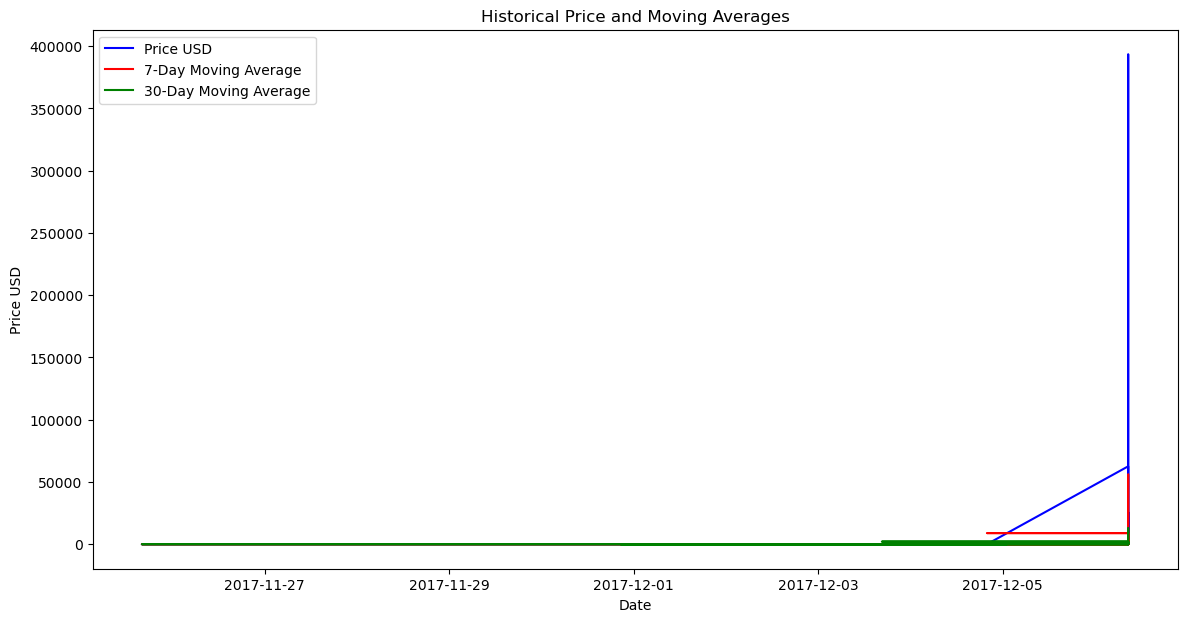

In [4]:
# Comparing the original price with the 7-day and 30-day moving averages to smooth out noise and identify underlying trends.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'last_updated' Unix timestamp to datetime
df['date'] = pd.to_datetime(df['last_updated'], unit='s')
# Calculate moving averages
df['7_day_moving_avg'] = df['price_usd'].rolling(window=7).mean()
df['30_day_moving_avg'] = df['price_usd'].rolling(window=30).mean()
# Plottings
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['price_usd'], label='Price USD', color='blue')
plt.plot(df['date'], df['7_day_moving_avg'], label='7-Day Moving Average', color='red')
plt.plot(df['date'], df['30_day_moving_avg'], label='30-Day Moving Average', color='green')
plt.title('Historical Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price USD')
plt.legend()
plt.show()

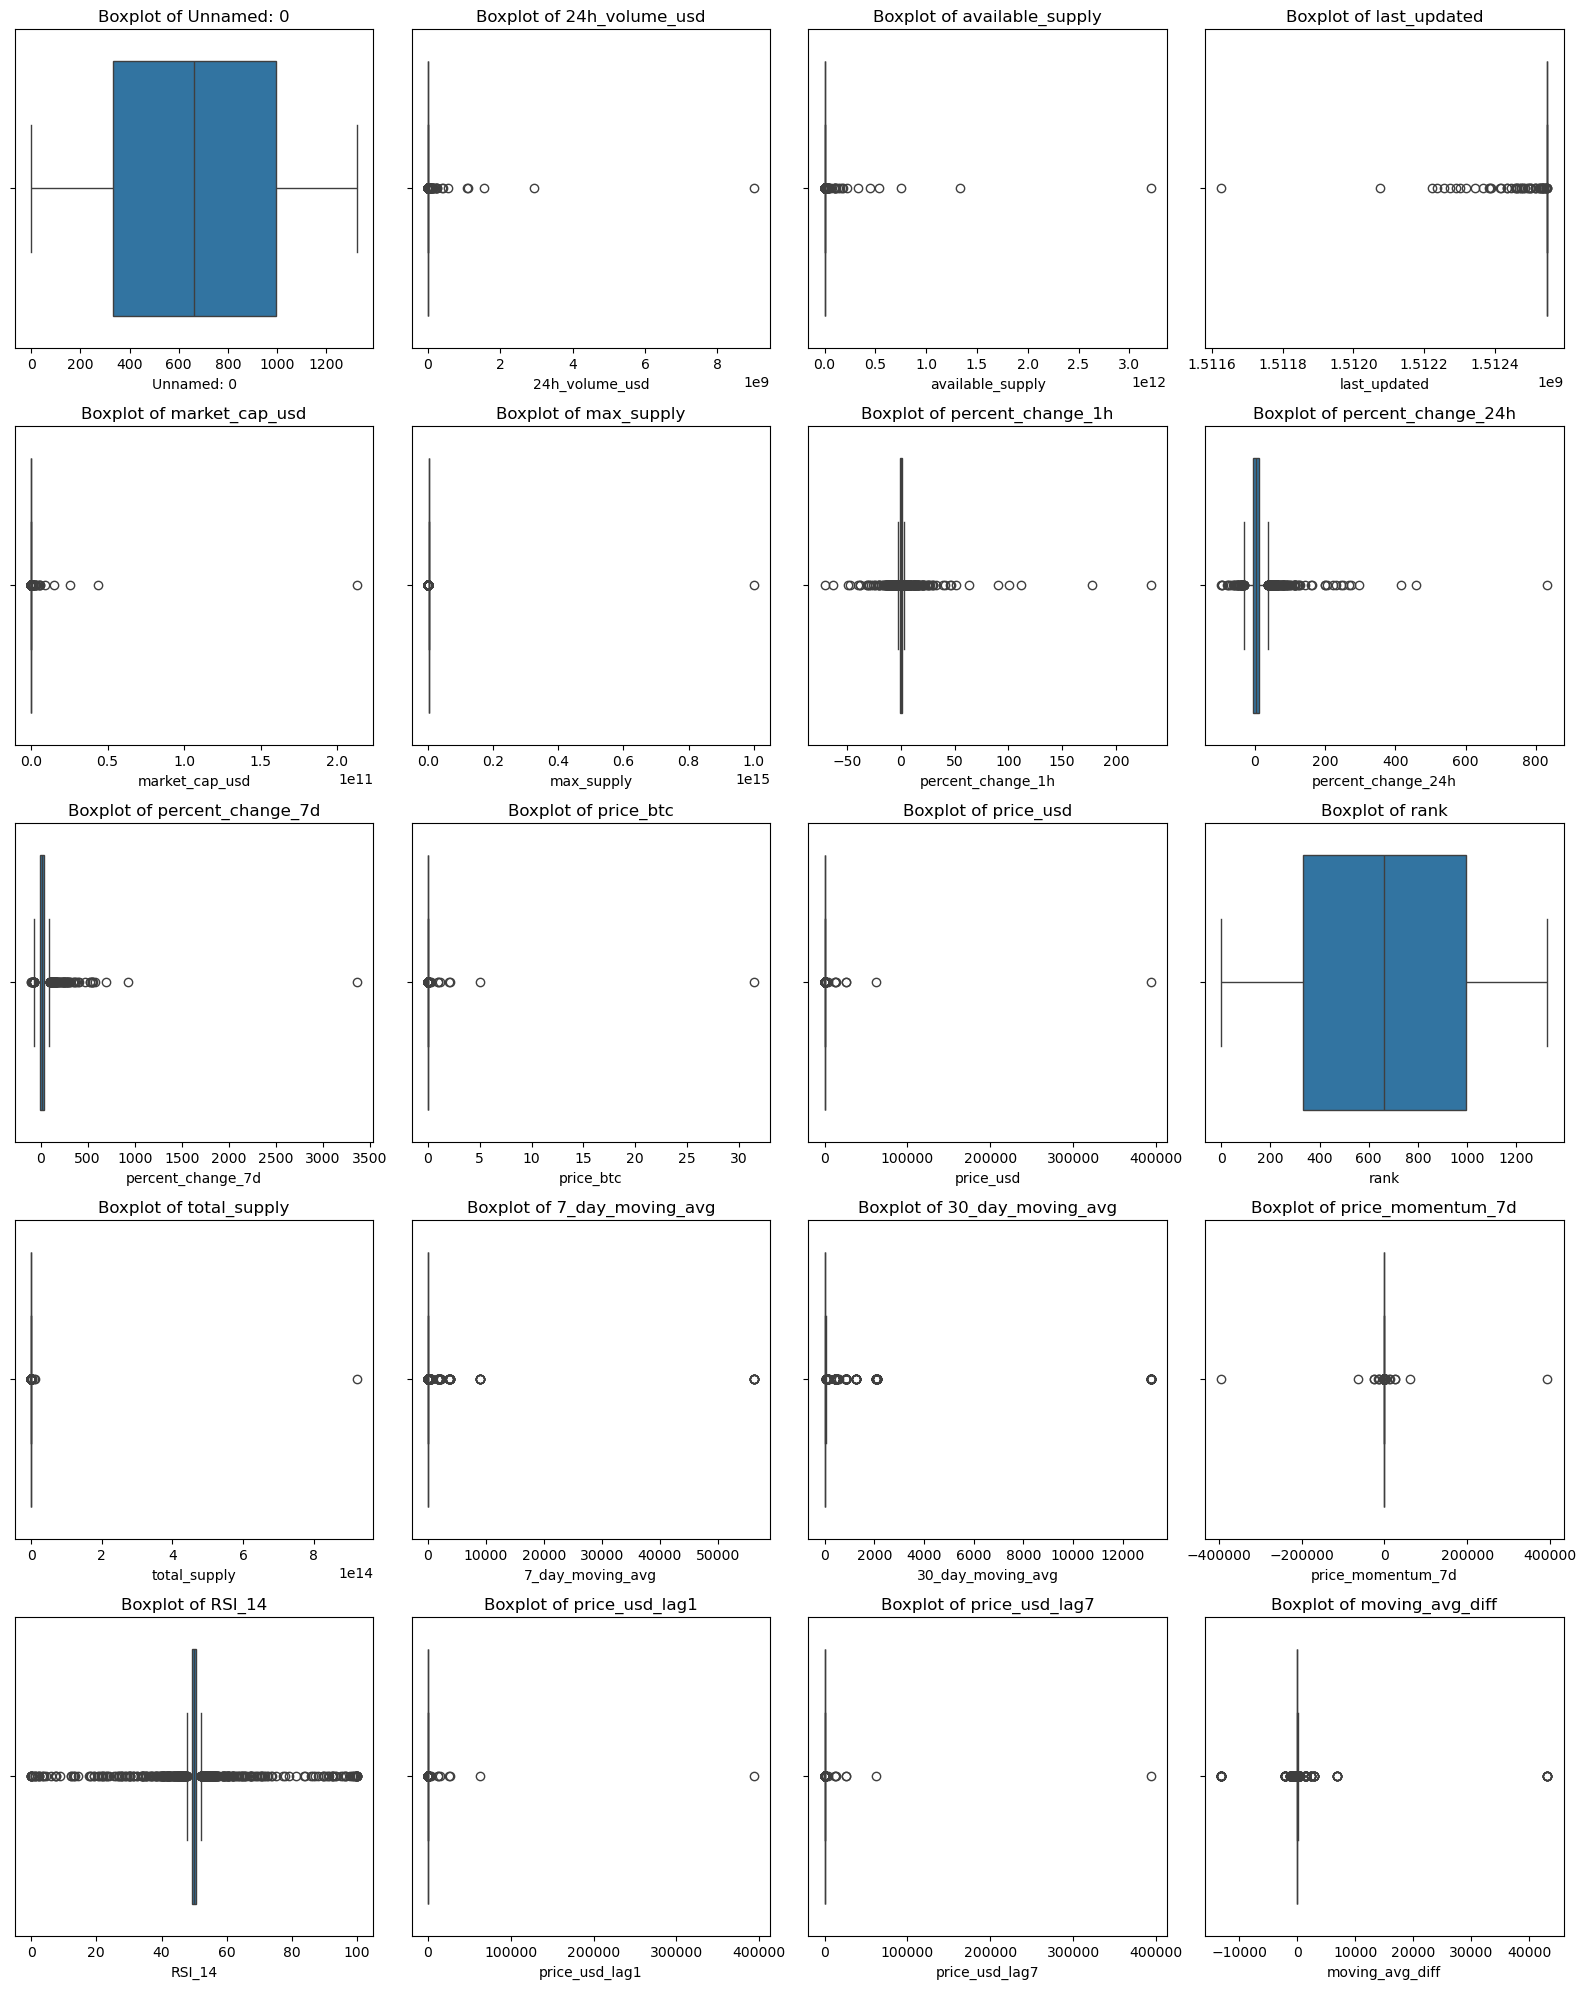

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the number of numeric columns
num_columns = len(df.select_dtypes(include=np.number).columns)

# Determine the number of rows required for the subplots
num_rows = (num_columns // 4) + (num_columns % 4 > 0)

# Step 1: Show Outliers using Boxplots
plt.figure(figsize=(16, num_rows * 4))
for i, column in enumerate(df.select_dtypes(include=np.number).columns):
    plt.subplot(num_rows, 4, i+1)  # Adjusted to handle different number of columns
    sns.boxplot(data=df, x=column)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

# Step 2: Show Distribution and Frequency Distribution using Histograms and KDE
plt.figure(figsize=(16, num_rows * 4))
for i, column in enumerate(df.select_dtypes(include=np.number).columns):
    plt.subplot(num_rows, 4, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Step 3: Show Correlation Matrix
correlation_matrix = df.corr()
print("Correlation Matrix:\n", correlation_matrix)

# Step 4: Create Scatter Plots for Pairwise Relationships
sns.pairplot(df.select_dtypes(include=np.number))
plt.show()

# Step 5: Create a Heatmap for Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()


# . Preprocessing the Data
The first step is to prepare the data for training, ensuring the input features are properly scaled for SVR.

# 2. Support Vector Regression (SVR)
Support Vector Regression (SVR) is sensitive to feature scaling, so we scaled the data in the previous step. Now, we train the SVR model.

Mean Squared Error: 11684.767124061367
R² Score: -0.009360726970819133
Accuracy: -0.94%


<Figure size 1200x600 with 0 Axes>

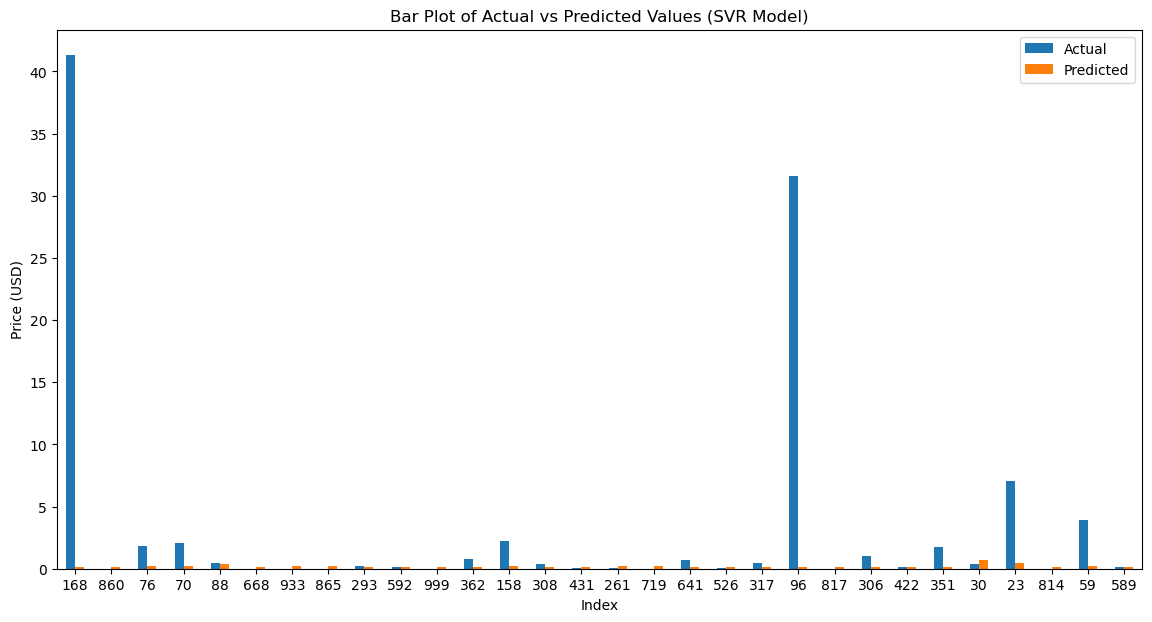

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the dataset
df = pd.read_csv("coinmarketcap_06122017.csv")

# Select relevant columns for features and target
features = ['market_cap_usd', '24h_volume_usd', 'available_supply', 'percent_change_1h', 
            'percent_change_24h', 'percent_change_7d']
target = 'price_usd'

# Drop rows with missing values in features or target
df_filtered = df.dropna(subset=features + [target])

# Extract features and target
X = df_filtered[features]
y = df_filtered[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (SVR requires scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVR model
svr = SVR(kernel='rbf')  
svr.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svr.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate accuracy based on the R² score
accuracy = r2 * 100

# Display results
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")
print(f"Accuracy: {accuracy:.2f}%")

# Create a DataFrame to store actual vs predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plot a bar plot to compare actual and predicted values
plt.figure(figsize=(12, 6))
# Take only the first 30 values for easier visualization
results_df_sample = results_df.head(30)
results_df_sample.plot(kind='bar', figsize=(14, 7))
plt.title("Bar Plot of Actual vs Predicted Values (SVR Model)")
plt.xlabel("Index")
plt.ylabel("Price (USD)")
plt.xticks(rotation=0)
plt.show()


# 3. Random Decision Trees (ExtraTreesRegressor)
For Random Decision Trees, you can use ExtraTreesRegressor, which is a type of ensemble learning model that creates multiple random decision trees.

Mean Squared Error: 0.046153846153846156
R² Score: 0.8142857142857143
Accuracy: 95.38%


<Figure size 800x600 with 0 Axes>

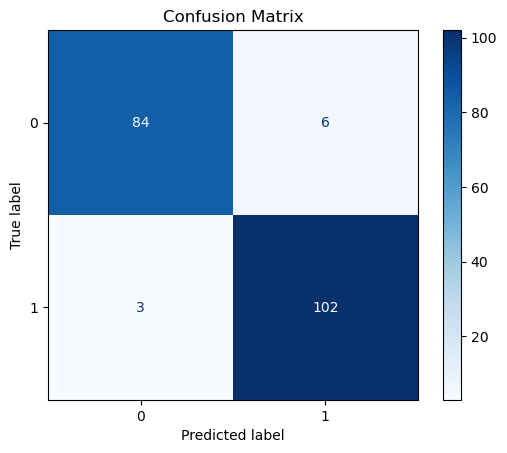

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("coinmarketcap_06122017.csv")

# Select relevant columns for features and target
features = ['market_cap_usd', '24h_volume_usd', 'available_supply', 'percent_change_1h', 
            'percent_change_24h', 'percent_change_7d']
target = 'price_usd'

# Convert the target into a binary classification problem (e.g., high vs. low price)
# Here, we'll create a simple binary target as an example
df['price_class'] = (df[target] > df[target].median()).astype(int)

# Drop rows with missing values in features or target
df_filtered = df.dropna(subset=features + ['price_class'])

# Extract features and target
X = df_filtered[features]
y = df_filtered['price_class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the ExtraTreesClassifier model
etc = ExtraTreesClassifier(n_estimators=100, random_state=42)
etc.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = etc.predict(X_test_scaled)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)  # Although not common for classification, here for completeness
r2 = r2_score(y_test, y_pred)  # R² is not typically used for classification

# Print metrics
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
